# Pandas

1. 자료구조 기능, 전처리 기능, 데이터 분석 기능, SpreadSHeet 기능 보유.
    
    1-1. 자료구조
        - Numpy(ndarray) + dict 구조. 검색속도 및 처리속도 빠름.
        - 열 중심 저장방식.
        - Dict의 key를 열, value를 행으로 인덱스 표시.
        - iloc(숫자), loc(key): 행, 열
    1-2. 데이터 처리
        - 3A : Accuracy, Actionalble, Agile
        - Wrangling, Munging 데이터 변환.
        - 전처리
            - 결측치 : isNa, notnull, fillNa(평균 or knn(유사도) or 0), dropNa
            - 이상치 : 3사분위수 + IQR(3-1사분면) * 1.5,
                       1사분위수 - IQR(3-1사분면) * 1.5
                       Boolean 연산으로 filtering
            - 범주형 : Categorical(), cut(), get_dummy()
            - 정규화 : min-max 정규화 (0~1 범위로 만들어주는 과정. 변수 간 중요도 동일시.)
                     : Z점수 정규화.
                     : Robust 정규화.
                     : Nomalization(사이즈 1로 방향 정규화).
            - 시각화 : matplotlib, pandas
            - 함수의 적용 : map(Seires 적용)
                            apply(열별, 행별)
                            applymap(DataFrame 적용)
            - 문자열 처리 : 일반함수(string)
                            정규표현식
                            메타문자열(\d - 숫자 / \D - 숫자제외 / \s - 공백 / \n\t \w
            - 데이터 변환 : astype(형변환), to_csv, to_sql, to_json
    1-3. 분석
        - 통계처리(var, std, skew, kurt, cov, corr(상관계수)
        - 회귀분석, 최소제곱법, 분산, 공분산, 상관계수, 평균

2. 종류
    - Series    : 1차원.
    - DataFrame : 2차원.
    - Pannel    : 3차원.



# 판다스 자료구조

In [10]:
import pandas as pd
data = {'a':0., 'b':1., 'c':2.}
s = pd.Series(data)
print(s['a'])
s = pd.Series(data, index=['b', 'c', 'd', 'a'])  # key의 순서를 보장하고 중복을 허용.
print(list(s), '\n')

print(data.keys())
print(data.values())
print(data.items(), '\n')

0.0
[1.0, 2.0, nan, 0.0] 

dict_keys(['a', 'b', 'c'])
dict_values([0.0, 1.0, 2.0])
dict_items([('a', 0.0), ('b', 1.0), ('c', 2.0)]) 

인덱스에 의한 출력 :  1
1
a    1
b    2
c    3
d    4
dtype: int64
a    1
b    2
c    3
dtype: int64
음수 ;  3


In [13]:
s = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
print('인덱스에 의한 출력 : ', s[0])
print(s['a'])
print(s['a':'d'])
print(s[:3])
print('음수 ; ', s[-3], '\n')

s['a'] = 100
print(s['a'], '\n')

print('filtering에 의한 출력 : ', s[s>4])

인덱스에 의한 출력 :  1
1
a    1
b    2
c    3
d    4
dtype: int64
a    1
b    2
c    3
dtype: int64
음수 ;  3 

100 

filtering에 의한 출력 :  a    100
e      5
dtype: int64


In [21]:
import numpy as np

data = np.array(['a','b','c','d'])
s = pd.Series(data)
print('시리즈 데이터', s.values)
print('시리즈 인덱스', s.index)  # index 자동화
print('시리즈 초기화', s)
print('시리즈 인덱스의 값', s.index.values)
print(s.head()) # tail()
print(s.value_counts())    # 도수분포표
print(s.value_counts(normalize = True))    # 상대도수분포표
print(s.describe())

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]
0    a
1    b
2    c
3    d
dtype: object
d    1
b    1
c    1
a    1
dtype: int64
d    0.25
b    0.25
c    0.25
a    0.25
dtype: float64
count     4
unique    4
top       d
freq      1
dtype: object


In [38]:
# 다음 데이터를 확인하시오.
# 차수, 시리즈 인덱스 타입, 객체출력

sdata = {'Ohio':35000, 'Texas':71000, 'Oregan':16000, 'Utah':5000}
states = ['California', 'Ohio', 'Oregan', 'Texas']
obj01 = pd.Series(sdata)
obj02 = pd.Series(sdata, index=states)

print('차수 : ', obj.shape)
print('시리즈 인덱스 타입 : ', obj.index)
print('\n객체 출력 : \n',obj, '\n')

print('null이 있는가? : \n', pd.isnull(obj02))
print('\n연산 결과 : \n', obj01 + obj02)

차수 :  (4,)
시리즈 인덱스 타입 :  Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')

객체 출력 : 
 Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64 

null이 있는가? : 
 California     True
Ohio          False
Oregan        False
Texas         False
dtype: bool

연산 결과 : 
 California         NaN
Ohio           70000.0
Oregan         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [39]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

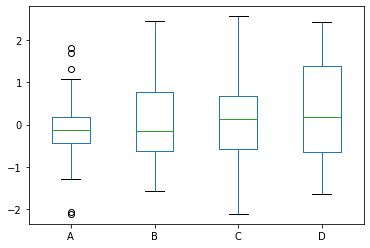

In [41]:
import matplotlib.pyplot as plt
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns = list('ABCD'))
ax = df.plot.box()
plt.show()

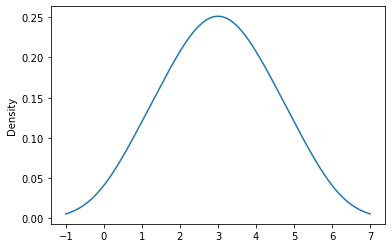

In [42]:
s = pd.Series([1, 2 ,2.5, 3, 3.5, 4, 5])
s.plot.kde()    # Kennel Density etimator. 보간법을 사용하여 중간 값 채우기.
plt.show()

In [43]:
area = pd.Series({'서울':423967, '부산':695662, '대전':141297,
                 '청주': 170312, '수원':149995})
pop = pd.Series({'서울':38332521, '부산':26448193, '대전':19651127,
                '청주': 1955860, '수원':12882135})
data=pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
서울,423967,38332521
부산,695662,26448193
대전,141297,19651127
청주,170312,1955860
수원,149995,12882135


In [57]:
print(data.dtypes)
print(data.ndim)
print(data.shape)

data['area'][1]
data['area']['서울']

data.loc['청주']
data.loc['청주', 'area']
data.iloc[1,1]

data.info()

area    int64
pop     int64
dtype: object
2
(5, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 서울 to 수원
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   pop     5 non-null      int64
dtypes: int64(2)
memory usage: 280.0+ bytes


In [64]:
data['density'] = data['pop'] / data['area']
print(data.values)
data.loc[:'서울', :'pop']
data.loc[data.density>100, ['pop', 'density']]

[[4.23967000e+05 3.83325210e+07 9.04139261e+01]
 [6.95662000e+05 2.64481930e+07 3.80187404e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95586000e+06 1.14839823e+01]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]


,pop,density
대전,19651127,139.076746


In [86]:
d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

df = pd.DataFrame(d)

print('데이터 타입 : \n',df.dtypes, '\n')
print('사이즈 : ',df.size, '\n')
print('값 : \n',df.values, '\n')
print('열 : ',df.columns, '\n')
print('축 : ',df.axes, '\n')
print('인덱스 : ',df.empty, '\n')
print('설명 \n', df.describe())
print('설명 \n', df.describe(include='all'))

df

데이터 타입 : 
 Name       object
Age       float64
Rating    float64
dtype: object 

사이즈 :  24 

값 : 
 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]] 

열 :  Index(['Name', 'Age', 'Rating'], dtype='object') 

축 :  [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')] 

인덱스 :  False 

설명 
              Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
설명 
        Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     육하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75

,Name,Age,Rating
0,김하나,25.0,4.23
1,이하나,26.0,3.24
2,삼하나,25.0,3.98
3,사하나,23.0,2.56
4,오하나,30.0,3.20
5,육하나,29.0,4.60
6,칠하나,23.0,3.80
7,팔하나,NaN,NaN


In [124]:
data={'state': ['경기', '강원', '서울', '충북', '인천'],
      'year':[2000,2001,2002,2001,2002],
      'pop':[1.5,1.7,3.6,2.4,2.9]} 

df = pd.DataFrame(data, index=['one', 'two', 'three', 'four', 'five'])

print(df['state'])

df['debt'] = 16.5

df['eastern'] = df['state'] == '서울'

val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
df['debt'] = val

df

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


,state,year,pop,debt,eastern
one,경기,2000,1.5,NaN,False
two,강원,2001,1.7,-1.2,False
three,서울,2002,3.6,NaN,True
four,충북,2001,2.4,-1.5,False
five,인천,2002,2.9,-1.7,False


In [126]:
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])
A + B

A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [129]:
import pandas as pd
data = {'name': ['하늘이', '찬호박', '우리야', '함께가', '하성공'],
'age': [40, 50, 30, 20, 70],
'preScore': [14, 28, 39, 25, 32],
'postScore': [20, 90, 55, 65, 79]}
df = pd.DataFrame(data,columns = ['name', 'age', 'preScore', 'postScore'])
df 
df.cov()

,age,preScore,postScore
age,370.0,18.5,200.5
preScore,18.5,85.3,142.4
postScore,200.5,142.4,723.7


In [133]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3),
                                     index=['a', 'b', 'c']),
                   'two' : pd.Series(np.random.randn(4),
                                     index=['a', 'b', 'c', 'd']),
                   'three' : pd.Series(np.random.randn(3),
                                     index=['b', 'c', 'd'])})
df2 = pd.DataFrame({'one' : pd.Series(np.random.randn(3),
                                     index=['a', 'b', 'c']),
                   'two' : pd.Series(np.random.randn(4),
                                     index=['a', 'b', 'c', 'd']),
                   'three' : pd.Series(np.random.randn(3),
                                     index=['b', 'c', 'd'])}) 

In [135]:
df1 = pd.DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
                    'B' : [np.nan, 2., 3., np.nan, 6.]})
print(df1)

df2 = pd.DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
                    'B' : [np.nan, np.nan, 3., 4., 6., 8.]})
print(df2)

combiner = lambda x, y: np.where(pd.isnull(x), y, x) 

     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  3.0
3  5.0  NaN
4  NaN  6.0
     A    B
0  5.0  NaN
1  2.0  NaN
2  4.0  3.0
3  NaN  4.0
4  3.0  6.0
5  7.0  8.0


In [198]:
data = {"서울": ['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],

       "부산": ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],

       "인천": ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],

       "대구": ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]}

columns=['지역','2018','2017','2016','2015','2015-2018증가율']

index = ["서울","부산","인천","대구"] 

df = pd.DataFrame(data, columns, index)

df = df.T

df['2015'] = df['2015'].astype('float')
df['2016'] = df['2016'].astype('float')
df['2017'] = df['2017'].astype('float')
df['2018'] = df['2018'].astype('float')

df['2015-2018증가율'] = df['2015-2018증가율']*100
df['2015-2017증가율'] = round((df['2017'] - df['2015'])/df['2015']*100, 2)
df

,지역,2018,2017,2016,2015,2015-2018증가율,2015-2017증가율
서울,수도권,9904312.0,9631482.0,9762546.0,9853972.0,2.83,-2.26
부산,경상권,3448737.0,3393191.0,3512547.0,3655437.0,1.63,-7.17
인천,수도권,2890451.0,2632035.0,2517680.0,2466338.0,9.82,6.72
대구,경상권,2466052.0,2431774.0,2456016.0,2473990.0,1.41,-1.71
